In [36]:
import numpy as np
import os
import netCDF4
from scipy import fftpack as fft
from scipy import linalg as lin
from scipy import signal as sig
from scipy import interpolate as naiso
from scipy import io
from matplotlib import pyplot as plt
%matplotlib inline
from sstanalysis import popmodel
reload(popmodel)

<module 'sstanalysis.popmodel' from 'sstanalysis/popmodel.pyc'>

In [2]:
base_dir = '/data/scratch/takaya/POP_data/'
fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jan.timeavg.nc')

ds = netCDF4.Dataset(fname)

In [3]:
ds

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format NETCDF3):
    title: hybrid_v5_rel04_BC5_ne120_t12_pop62
    history: Thu Sep 24 11:54:53 2015: ncra /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0051-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0052-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0053-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0054-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0055-01.nc /glade/p/ncgd0001/hybrid_v5_rel04_BC5_ne120_t12_pop62/ocn-hist/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0056-01.nc /gl

In [4]:
SST = ds['TEMP'][:,0]
maskT = ds['KMT'][:] <= 1
maskU = ds['KMU'][:] <= 1
lat = ds['TLAT'][:]
lon = ds['TLONG'][:]
print SST.shape

(1, 2400, 3600)


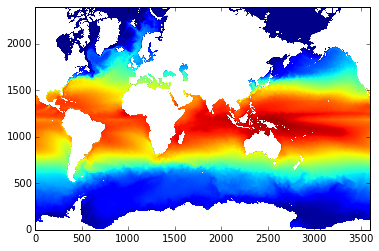

In [5]:
plt.figure()
plt.imshow(np.ma.masked_array(SST[0], maskT), origin='bottom')

In [6]:
winter = np.array(['Jan', 'Feb', 'Mar'])
summer = np.array(['Jul', 'Aug', 'Sep'])
# print winter

SST_win = np.copy(lat)
SST_sum = np.copy(lon)
SST_win[:] = 0.
SST_sum[:] = 0.
SSS_win = SST_win.copy()
SSS_sum = SST_sum.copy()
U_win = SST_win.copy()
U_sum = SST_sum.copy()
V_win = SST_win.copy()
V_sum = SST_sum.copy()
KE_win = SST_win.copy()
KE_sum = SST_sum.copy()

for month in winter:
    fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.%3s.timeavg.nc' % month)
    print fname
    ds = netCDF4.Dataset(fname)
    SST_win += ds['TEMP'][0,0]
    SSS_win += ds['SALT'][0,0]
    U_win += ds['UVEL'][0,0]
    V_win += ds['VVEL'][0,0]
    KE_win += ds['KE'][0,0]
    
#     plt.figure()
#     plt.imshow(ds['TEMP'][0,0], origin='bottom')
#     plt.show()

SST_win /= len(winter)
SSS_win /= len(winter)
U_win /= len(winter)
V_win /= len(winter)
KE_win /= len(winter)

for month in summer:
    fname = os.path.join(base_dir, 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.%3s.timeavg.nc' % month)
    print fname
    ds = netCDF4.Dataset(fname)
    SST_sum += ds['TEMP'][0,0]
    SSS_sum += ds['SALT'][0,0]
    U_sum += ds['UVEL'][0,0]
    V_sum += ds['VVEL'][0,0]
    KE_sum += ds['KE'][0,0]
#     plt.figure()
#     plt.imshow(ds['TEMP'][0,0], origin='bottom')
#     plt.show()

SST_sum /= len(summer)
SSS_sum /= len(summer)
U_sum /= len(winter)
V_sum /= len(winter)
KE_sum /= len(winter)

/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jan.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Feb.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Mar.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Jul.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Aug.timeavg.nc
/data/scratch/takaya/POP_data/hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.0050-0059.Sep.timeavg.nc


In [56]:
from tempfile import TemporaryFile
POP_Seasonal_Climatology_Passive = TemporaryFile()
np.savez('POP_Seasonal_Climatology_Passive', SST_winter=SST_win, SST_summer=SST_sum, 
         SSS_winter=SSS_win, SSS_summer=SSS_sum, 
         dx=ds['DXT'][:], dy=ds['DYT'][:], Lat=ds['TLAT'], Lon=ds['TLONG'], mask=maskT)
POP_Seasonal_Climatology_Passive.seek(0)

from tempfile import TemporaryFile
POP_Seasonal_Climatology_Active = TemporaryFile()
np.savez('POP_Seasonal_Climatology_Active', U_winter=U_win, U_summer=U_sum, 
         V_winter=V_win, V_summer=V_sum, KE_winter=KE_win, KE_summer=KE_sum,
         dx=ds['DXU'][:], dy=ds['DYU'][:], Lat=ds['ULAT'], Lon=ds['ULONG'], mask=maskU)
POP_Seasonal_Climatology_Active.seek(0)

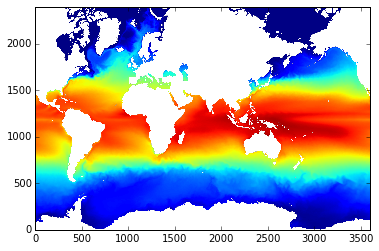

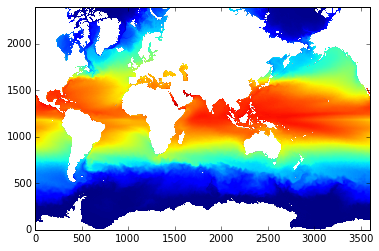

In [27]:
plt.figure()
plt.imshow(np.ma.masked_array(SST_win, mask), origin='bottom')

plt.figure()
plt.imshow(np.ma.masked_array(SST_sum, mask), origin='bottom')

In [8]:
dlat, dlon = (10., 10.)
lat_start, lat_end = (-60., 50.)
lon_start, lon_end = (5., 345.)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)
Degx, Degy = (int((lon_end-lon_start)/dlon), int((lat_end-lat_start)/dlat))
# lon_global = np.arange(lon_start, lon_end+2*dlon, dlon)
# lat_global = np.arange(lat_start, lat_end+2*dlat, dlat)
# Lon_global, Lat_global = np.meshgrid(lon_global, lat_global)
# base_dir = '/home/../../../data/scratch/rpa/cesm/hybrid_v5_rel04_BC5_ne120_t12_pop62/'

print Degx, Degy, (Degx+1)*(Degy+1)
# print Lon_global.shape

34 11 420


In [9]:
roll = -1080

# fname = base_dir + 'hybrid_v5_rel04_BC5_ne120_t12_pop62.pop.h.nday1.0046-02-01.nc'
# f = netCDF4.Dataset(fname)
mask = ds.variables['KMT'][:] <= 1
#SSH = 1e-2*f.variables['SSH_2'][:]
tlon = np.roll(np.ma.masked_array(ds.variables['TLONG'][:],mask), roll, axis=1)
tlat = np.roll(np.ma.masked_array(ds.variables['TLAT'][:],mask), roll, axis=1)


lonrange=np.array([lon_start, lon_end])
latrange=np.array([lat_start, lat_end+5.])
lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
boxidx = lonmask & latmask # this won't necessarily be square
irange = np.where(boxidx.sum(axis=0))[0]
imin_bound, imax_bound = irange.min(), irange.max()
jrange = np.where(boxidx.sum(axis=1))[0]
jmin_bound, jmax_bound = jrange.min(), jrange.max()


In [10]:
npzfile = np.load('interpLatnLon.npz')
print npzfile.files
tlat = npzfile['arr_0']
tlon = npzfile['arr_1']

['arr_1', 'arr_0']


# Variance

## Salinity

In [43]:
npzfile = np.load('POP_Seasonal_Climatology_Passive.npz')
print npzfile.files
SSS_win = np.roll( npzfile['SSS_winter'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound, imin_bound:imax_bound]
SSS_sum = np.roll( npzfile['SSS_summer'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound, imin_bound:imax_bound]
mask = np.roll( npzfile['mask'].copy(), roll, axis=1 )[jmin_bound:jmax_bound, imin_bound:imax_bound]
lat = np.roll( npzfile['Lat'].copy(), roll, axis=1 )[jmin_bound:jmax_bound, imin_bound:imax_bound]
lon = np.roll( npzfile['Lon'].copy(), roll, axis=1 )[jmin_bound:jmax_bound, imin_bound:imax_bound]
dx = np.roll( npzfile['dx'].copy(), roll, axis=1 )[jmin_bound:jmax_bound, imin_bound:imax_bound]
dy = np.roll( npzfile['dy'].copy(), roll, axis=1 )[jmin_bound:jmax_bound, imin_bound:imax_bound].copy()

['SST_winter', 'mask', 'Lon', 'SSS_winter', 'SST_summer', 'SSS_summer', 'dx', 'dy', 'Lat']


In [44]:
Variance_winter_SSS = np.zeros((Degy+1, Degx+1))
Variance_summer_SSS = np.zeros((Degy+1, Degx+1))

In [45]:
crit = 0.01
j,i = (0,0)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)

while south < lat_end+dlat:
#     print i,j
    west = lon_start
    east = west+dlon
    i = 0
    while west < lon_end+dlon:

        lonrange = np.array([west,east])
        latrange = np.array([south,north])
        lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
        latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
        boxidx = lonmask & latmask # this won't necessarily be square
        irange = np.where(boxidx.sum(axis=0))[0]
        imin, imax = irange.min(), irange.max()
        jrange = np.where(boxidx.sum(axis=1))[0]
        jmin, jmax = jrange.min(), jrange.max()
            #print imin, imax, jmin, jmax
        
        
        region_mask = mask[jmin:jmax, imin:imax]
        Ny, Nx = region_mask.shape
        land_fraction = region_mask.sum().astype('f8') / (Ny*Nx)
            #SSH_domain = SSH[..., jmin:jmax, imin:imax]

    
        if land_fraction < crit:
#             print 'Ok'

            nday = 1
            
            dx_dom = dx[jmin:jmax,imin:imax].copy()
            dy_dom = dy[jmin:jmax,imin:imax].copy()
            k = 2*np.pi*fft.fftshift(fft.fftfreq(Nx, dx_dom[Ny/2,Nx/2]))
            l = 2*np.pi*fft.fftshift(fft.fftfreq(Ny, dy_dom[Ny/2,Nx/2]))
            dk = np.diff(k)[0]*.5/np.pi
            dl = np.diff(l)[0]*.5/np.pi
                        
#=#=#=#=#=#=#=#=#=#=#=#=#=#
#         Winter
            Ti = np.ma.masked_array(SSS_win[ jmin:jmax, imin:imax].copy(), region_mask)
            
#         Interpolate gaps if necessary
            if land_fraction > 0. and land_fraction < crit:
                x = np.arange(0,Nx)
                y = np.arange(0,Ny)
                X,Y = np.meshgrid(x,y)
                Zr = Ti.ravel()
                Xr = np.ma.masked_array(X.ravel(), Zr.mask)
                Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
                Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
                Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
                Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
                                        Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
                Znew = Zr.data
                Znew[Zr.mask] = Zm
                Znew.shape = Ti.shape
                Ti = Znew
            elif land_fraction == 0.:
                        # no problem
                pass
            else:
                break
        
            # Detrend the data in two dimensions (least squares plane fit)
            d_obs = np.reshape(Ti, (Nx*Ny,1))
            G = np.ones((Ny*Nx,3))
            for n in range(Ny):
                G[Nx*n:Nx*n+Nx, 0] = n+1
                G[Nx*n:Nx*n+Nx, 1] = np.arange(1, Nx+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (Ny, Nx))
            Ti -= Lin_trend

            # Window the data
            # Hanning window
            windowx = sig.hann(Nx)
            windowy = sig.hann(Ny)
            window = windowx*windowy[:,np.newaxis] 
            Ti *= window
                        
            Var_win = ( Ti**2*dx_dom*dy_dom ).sum()

#=#=#=#=#=#=#=#=#=#=#=#=#

#          Summer
            Ti = np.ma.masked_array(SSS_sum[jmin:jmax, imin:imax].copy(), region_mask)
             
#         Interpolate gaps if necessary
            if land_fraction > 0. and land_fraction < crit:
                x = np.arange(0,Nx)
                y = np.arange(0,Ny)
                X,Y = np.meshgrid(x,y)
                Zr = Ti.ravel()
                Xr = np.ma.masked_array(X.ravel(), Zr.mask)
                Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
                Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
                Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
                Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
                                        Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
                Znew = Zr.data
                Znew[Zr.mask] = Zm
                Znew.shape = Ti.shape
                Ti = Znew
            elif land_fraction == 0.:
                # no problem
                pass
            else:
                break
        
            # Detrend the data in two dimensions (least squares plane fit)
            d_obs = np.reshape(Ti, (Nx*Ny,1))
            G = np.ones((Ny*Nx,3))
            for n in range(Ny):
                G[Nx*n:Nx*n+Nx, 0] = n+1
                G[Nx*n:Nx*n+Nx, 1] = np.arange(1, Nx+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (Ny, Nx))
            Ti -= Lin_trend

            # Window the data
            # Hanning window
            windowx = sig.hann(Nx)
            windowy = sig.hann(Ny)
            window = windowx*windowy[:,np.newaxis] 
            Ti *= window
                        
            Var_sum = ( Ti**2*dx_dom*dy_dom ).sum()

            Variance_winter_SSS[j,i] = Var_win
            Variance_summer_SSS[j,i] = Var_sum
              
        else:
            Variance_winter_SSS[j,i] = np.NAN
            Variance_summer_SSS[j,i] = np.NAN

#         print i,j
        west = east
        east = west+dlon
        i += 1
    
    south = north
    north = south+dlat
    j += 1
    

-c:27: RuntimeWarning: invalid value encountered in double_scalars


In [46]:
from tempfile import TemporaryFile
POP_Seasonal_Climatology_varSSS = TemporaryFile()
np.savez('POP_Seasonal_Climatology_varSSS', varSSS_win=Variance_winter_SSS, varSSS_sum=Variance_summer_SSS)
POP_Seasonal_Climatology_varSSS.seek(0)

## Temperature

In [47]:
SST_win = np.roll( npzfile['SST_winter'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound, imin_bound:imax_bound].copy()
SST_sum = np.roll( npzfile['SST_summer'].copy(), roll, axis=1 )[..., jmin_bound:jmax_bound, imin_bound:imax_bound].copy()

In [48]:
Variance_winter_SST = np.zeros((Degy+1, Degx+1))
Variance_summer_SST = np.zeros((Degy+1, Degx+1))

In [49]:
crit = 0.01
j,i = (0,0)
west, south = (lon_start, lat_start)
east, north = (west+dlon, south+dlat)

while south < lat_end+dlat:
#     print i,j
    west = lon_start
    east = west+dlon
    i = 0
    while west < lon_end+dlon:

        lonrange = np.array([west,east])
        latrange = np.array([south,north])
        lonmask = (tlon >= lonrange[0]) & (tlon < lonrange[1])
        latmask = (tlat >= latrange[0]) & (tlat < latrange[1])
        boxidx = lonmask & latmask # this won't necessarily be square
        irange = np.where(boxidx.sum(axis=0))[0]
        imin, imax = irange.min(), irange.max()
        jrange = np.where(boxidx.sum(axis=1))[0]
        jmin, jmax = jrange.min(), jrange.max()
            #print imin, imax, jmin, jmax
        
        
        region_mask = mask[jmin:jmax, imin:imax]
        Ny, Nx = region_mask.shape
        land_fraction = region_mask.sum().astype('f8') / (Ny*Nx)
            #SSH_domain = SSH[..., jmin:jmax, imin:imax]

    
        if land_fraction < crit:
#             print 'Ok'

            nday = 1
            
            dx_dom = dx[jmin:jmax,imin:imax].copy()
            dy_dom = dy[jmin:jmax,imin:imax].copy()
            k = 2*np.pi*fft.fftshift(fft.fftfreq(Nx, dx_dom[Ny/2,Nx/2]))
            l = 2*np.pi*fft.fftshift(fft.fftfreq(Ny, dy_dom[Ny/2,Nx/2]))
            dk = np.diff(k)[0]*.5/np.pi
            dl = np.diff(l)[0]*.5/np.pi
                        
#=#=#=#=#=#=#=#=#=#=#=#=#=#
#         Winter
            Ti = np.ma.masked_array(SST_win[ jmin:jmax, imin:imax].copy(), region_mask)
            
#         Interpolate gaps if necessary
            if land_fraction > 0. and land_fraction < crit:
                x = np.arange(0,Nx)
                y = np.arange(0,Ny)
                X,Y = np.meshgrid(x,y)
                Zr = Ti.ravel()
                Xr = np.ma.masked_array(X.ravel(), Zr.mask)
                Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
                Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
                Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
                Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
                                        Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
                Znew = Zr.data
                Znew[Zr.mask] = Zm
                Znew.shape = Ti.shape
                Ti = Znew
            elif land_fraction == 0.:
                        # no problem
                pass
            else:
                break
        
            # Detrend the data in two dimensions (least squares plane fit)
            d_obs = np.reshape(Ti, (Nx*Ny,1))
            G = np.ones((Ny*Nx,3))
            for n in range(Ny):
                G[Nx*n:Nx*n+Nx, 0] = n+1
                G[Nx*n:Nx*n+Nx, 1] = np.arange(1, Nx+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (Ny, Nx))
            Ti -= Lin_trend

            # Window the data
            # Hanning window
            windowx = sig.hann(Nx)
            windowy = sig.hann(Ny)
            window = windowx*windowy[:,np.newaxis] 
            Ti *= window
                        
            Var_win = ( Ti**2*dx_dom*dy_dom ).sum()

#=#=#=#=#=#=#=#=#=#=#=#=#

#          Summer
            Ti = np.ma.masked_array(SST_sum[jmin:jmax, imin:imax].copy(), region_mask)
             
#         Interpolate gaps if necessary
            if land_fraction > 0. and land_fraction < crit:
                x = np.arange(0,Nx)
                y = np.arange(0,Ny)
                X,Y = np.meshgrid(x,y)
                Zr = Ti.ravel()
                Xr = np.ma.masked_array(X.ravel(), Zr.mask)
                Yr = np.ma.masked_array(Y.ravel(), Zr.mask)
                Xm = np.ma.masked_array( Xr.data, ~Xr.mask ).compressed()
                Ym = np.ma.masked_array( Yr.data, ~Yr.mask ).compressed()
                Zm = naiso.griddata(np.array([Xr.compressed(), Yr.compressed()]).T, 
                                        Zr.compressed(), np.array([Xm,Ym]).T, method='nearest')
                Znew = Zr.data
                Znew[Zr.mask] = Zm
                Znew.shape = Ti.shape
                Ti = Znew
            elif land_fraction == 0.:
                # no problem
                pass
            else:
                break
        
            # Detrend the data in two dimensions (least squares plane fit)
            d_obs = np.reshape(Ti, (Nx*Ny,1))
            G = np.ones((Ny*Nx,3))
            for n in range(Ny):
                G[Nx*n:Nx*n+Nx, 0] = n+1
                G[Nx*n:Nx*n+Nx, 1] = np.arange(1, Nx+1)    
            m_est = np.dot(np.dot(lin.inv(np.dot(G.T, G)), G.T), d_obs)
            d_est = np.dot(G, m_est)
            Lin_trend = np.reshape(d_est, (Ny, Nx))
            Ti -= Lin_trend

            # Window the data
            # Hanning window
            windowx = sig.hann(Nx)
            windowy = sig.hann(Ny)
            window = windowx*windowy[:,np.newaxis] 
            Ti *= window
                        
            Var_sum = ( Ti**2*dx_dom*dy_dom ).sum()

            Variance_winter_SST[j,i] = Var_win
            Variance_summer_SST[j,i] = Var_sum
              
        else:
            Variance_winter_SST[j,i] = np.NAN
            Variance_summer_SST[j,i] = np.NAN

#         print i,j
        west = east
        east = west+dlon
        i += 1
    
    south = north
    north = south+dlat
    j += 1
    

-c:27: RuntimeWarning: invalid value encountered in double_scalars


In [50]:
from tempfile import TemporaryFile
POP_Seasonal_Climatology_varSST = TemporaryFile()
np.savez('POP_Seasonal_Climatology_varSST', varSST_win=Variance_winter_SST, varSST_sum=Variance_summer_SST)
POP_Seasonal_Climatology_varSST.seek(0)

In [51]:
fname = 'psd_slope_SSH_Global.mat'
f_psd_slope = io.loadmat(fname)
Lon = f_psd_slope['Lon']
Lat = f_psd_slope['Lat']

In [52]:
npzfile = np.load('POP_Seasonal_Climatology_varSSS.npz')
print npzfile.files
varSSS_win=npzfile['varSSS_win']
varSSS_sum = npzfile['varSSS_sum']

npzfile = np.load('POP_Seasonal_Climatology_varSST.npz')
print npzfile.files
varSST_win=npzfile['varSST_win']
varSST_sum = npzfile['varSST_sum']

['varSSS_win', 'varSSS_sum']
['varSST_sum', 'varSST_win']


In [53]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='robin', lon_0=180)

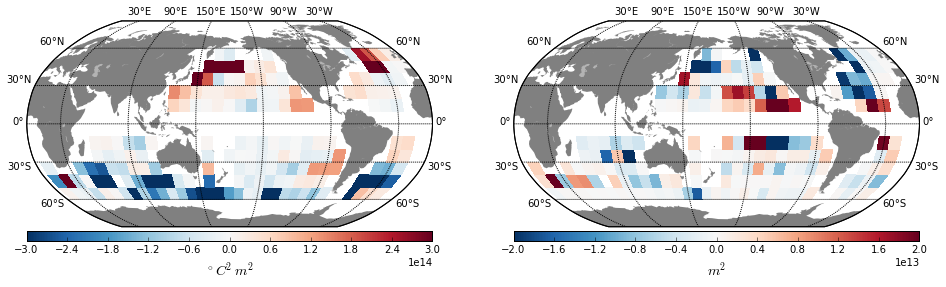

In [64]:
j_eq_bot = 5
j_eq_top = 7
varSST_win[j_eq_bot:j_eq_top] = np.nan
varSST_sum[j_eq_bot:j_eq_top] = np.nan
varSSS_win[j_eq_bot:j_eq_top] = np.nan
varSSS_sum[j_eq_bot:j_eq_top] = np.nan

fig = plt.figure(figsize=(16,6))

axi = fig.add_subplot(121)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
pc = m.pcolormesh(x, y, np.ma.masked_invalid( varSST_win - varSST_sum ), cmap='RdBu_r')
pc.set_clim([-.3e15, .3e15])
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('$^{\circ}C^2 m^2$', fontsize=14)

axi = fig.add_subplot(122)
m.fillcontinents(color='0.5', lake_color='0.7')
m.drawmapboundary(fill_color='none')
x,y = m(Lon,Lat)
pc = m.pcolormesh(x, y, np.ma.masked_invalid( varSSS_win - varSSS_sum ), cmap='RdBu_r')
pc.set_clim([-.2e14,.2e14])
m.drawparallels(range(-60,61,30), labels=[1,1,0,0]);
m.drawmeridians(range(30,360,60), labels=[0,0,1,1]);
cbar = m.colorbar(pc, location='bottom')
cbar.set_label('$m^2$', fontsize=14)

# plt.savefig('SSS_SST_Seasonal_Climatology_Variance.png', bbox_inches='tight')